In [15]:
#!pip install sentinelhub

# Commercial data

For use of commercial data you have to first provide your sentinel-hub account client id and client secret.

In [21]:
from sentinelhub import SHConfig
from oauthlib.oauth2 import BackendApplicationClient
from requests_oauthlib import OAuth2Session
from SentinelHubCommercialData import SentinelHubCommercialData
from CommercialDataBase import Providers, AirbusConstellation, ThumbnailType, WorldViewKernel, WorldViewSensor, SkySatType, SkySatBundle, ScopeType, ScopeBundle
import pandas as pd

config = SHConfig()
config.sh_client_id = '792571cd-7ee1-456d-bdc7-7334e6b610f0'
config.sh_client_secret = ')Kw:<ZC1975EsLNx6R-c65[[-+X3C]/Yp8-<#!p5'
config.sh_base_url = "https://services.sentinel-hub.com"

shcd = SentinelHubCommercialData(config)

## Getting quotas

In [6]:
# Optional 1: To get single quota add id as parameter
#
#     shcd.quotas("asd124-12ddas...")
#
# Optional 2: Get raw response
#
#     shcd.quotas(raw=True)
#

q = shcd.quotas()
print(q)



AIRBUS_SPOT
Quota: 1000.0
Used: 17.0
----------
AIRBUS_PLEIADES
Quota: 100.0
Used: 7.0
----------



# Simple search

Setting date and time

In [13]:
time_from = "2017-05-25T00:00:00Z"
time_to = "2018-10-25T23:59:59Z"

Setting search area

In [8]:
# Option 1: Set bounds as bbox
bounds = [
  12.742243,
  42.05043,
  12.746302,
  42.053218
]

# Option 2: Set bounds as Polygon
bounds = {
  "type": "Polygon",
  "coordinates": [
   [
    [
     12.500395,
     41.931337
    ],
    [
     12.507856,
     41.931018
    ],
    [
     12.507513,
     41.927825
    ],
    [
     12.50048,
     41.928719
    ],
    [
     12.500395,
     41.931337
    ]
   ]
  ]
 }

### AIRBUS Pleiades & SPOT

In [5]:

# Option 1: AIRBUS Pleiades & SPOT
# Optional parameters: 
#    - maxCloudCoverage (Values: 0-100 | 100 as default)
#    - maxSnowCoverage (Vaules: 0-90 | 90 as default)
#    - maxIncidenceAngle (Values: 0-90 | 90 as default)
#    - processingLevel (Values: "Sensor","Album" | "Sensor","Album" as default)
#
#  example: shcd.search_airbus(AirbusConstellation, Bounds, Time_From, Time_To, *Optional parameters*)

(data, query) = shcd.search_airbus(AirbusConstellation.SPOT, bounds, time_from, time_to, maxCloudCoverage=90, maxSnowCoverage=50)

# Getting ids
item_ids = [feature["properties"]["id"] for feature in data.features]
print(item_ids)


['be54c404-6111-4cac-844b-56ee1edf0a27', '761004d2-e0f0-4b08-bb57-07bddc522004', '29564858-c19b-4eca-b6ff-e001723106a3', '5dfda8a2-1357-4868-9f46-dda50ef52d52', 'f93a332d-91a8-4e51-a1b5-cf653b82cf2f', 'f460e773-04a7-48bb-87b3-b7210b649c10']


### Planet SCOPE

In [17]:

# Option 2: Planet SCOPE
# Optional parameters: 
#    - maxCloudCoverage (Values: 0-100 | 100 as default)
#
#  example: shcd.search_airbus(ScopeType, ScopeBundle, Bounds, Time_From, Time_To, *Optional parameters*)

(data, query) = shcd.search_planet(ScopeType.PSScene, ScopeBundle.ANALYTIC_UDM2, bounds, time_from, time_to, maxCloudCoverage=90)

# Getting ids
item_ids = [feature["id"] for feature in data.features]
print(item_ids)


['20180820_093024_1027', '20181003_093030_0f42', '20181003_093031_0f42', '20181003_093207_0f15', '20181025_090238_0f21', '20181025_093206_101f', '20181023_093254_0f34', '20181022_093205_101e', '20181021_093121_1029', '20181020_093132_1014', '20181019_093149_103c', '20181019_093148_103c', '20181017_092829_0e20', '20181018_093134_1027', '20181015_093122_103b', '20181014_093159_1044', '20181013_093132_1005', '20181010_092620_1105', '20181010_092619_1105', '20181010_093153_1006', '20181008_093045_100c', '20181007_092645_0e26', '20181002_093142_0f34', '20181001_093125_101e', '20180930_092957_100e', '20180929_093050_1035', '20180928_093145_101b', '20180925_093052_1032', '20180925_092853_0f22', '20180924_093147_0f17', '20180922_093051_1024', '20180921_093035_1010', '20180921_093036_1010', '20180916_093025_1033', '20180914_093119_100a', '20180911_093121_103a', '20180910_093105_1011', '20180909_093019_102c', '20180909_093018_102c', '20180907_093105_0f43', '20180907_093137_103d', '20180907_09313

### Planet SkySat

In [12]:

# Option 3: Planet SkySat
#
#  example: shcd.search_airbus(ScopeType, ScopeBundle, Bounds, Time_From, Time_To, planetApiKey=<your_planey_api_key>)

(data, query) = shcd.search_planet(SkySatType.SkySatCollect, SkySatBundle.PANCHROMATIC, bounds, time_from, time_to, planetApiKey="")

# Getting ids
item_ids = [feature["id"] for feature in data.features]
print(item_ids)


[]


### WorldView

In [9]:

# Option 4: WorldView MAXAR
# Optional parameters:
#    - maxCloudCoverage (Values: 0-100 | 100 as default)
#    - minOffNadir (Values: 0-45 | 0 as default)
#    - maxOffNadir (Values: 0-45 | 45 as default)
#    - minSunElevation (Values: 0-90 | o as default)
#    - maxSunElevation (Values: 0-90 | 90 as default)
#    - sensor (Values: WorldViewSensor | Any as default)
#
#  example: shcd.search_airbus(WorldViewKernel, ScopeBundle, Bounds, Time_From, Time_To, *Optional parameters*)
#

(data, query) = shcd.search_worldview(WorldViewKernel.MTF, bounds, time_from, time_to, sensor=WorldViewSensor.WV01.value)

# Getting ids
item_ids = [feature["catalogID"] for feature in data.features]



## Getting response information

### AIRBUS SPOT & Pleiades

In [7]:
props = ["id", "acquisitionDate", "resolution", "cloudCover", "incidenceAngle"]
for idx, feature in enumerate(data.features):
  print(pd.DataFrame(
    map(lambda h: feature["properties"][h], props), props
  ))
  print("-------------------------------------")


                                                    0
id               be54c404-6111-4cac-844b-56ee1edf0a27
acquisitionDate                  2017-08-05T09:30:52Z
resolution                                        1.5
cloudCover                                          0
incidenceAngle                               10.93918
-------------------------------------
                                                    0
id               761004d2-e0f0-4b08-bb57-07bddc522004
acquisitionDate                  2017-08-05T09:30:52Z
resolution                                        1.5
cloudCover                                          0
incidenceAngle                               10.93918
-------------------------------------
                                                    0
id               29564858-c19b-4eca-b6ff-e001723106a3
acquisitionDate                  2017-08-06T12:30:50Z
resolution                                        1.5
cloudCover                                          0
incide

### Planet Scope & SkySat

In [19]:
props = ["cloud_cover", "snow_ice_percent", "acquired", "pixel_resolution"]
for idx, feature in enumerate(data.features):
  print("id:", feature["id"])
  print(pd.DataFrame(
    map(lambda h: feature["properties"][h], props), props
  ))
  print("-------------------------------------")


id: 20180820_093024_1027
                                            0
cloud_cover                                 0
snow_ice_percent                            0
acquired          2018-08-20T09:30:24.339885Z
pixel_resolution                            3
-------------------------------------
id: 20181003_093030_0f42
                                            0
cloud_cover                                 0
snow_ice_percent                            0
acquired          2018-10-03T09:30:30.723976Z
pixel_resolution                            3
-------------------------------------
id: 20181003_093031_0f42
                                            0
cloud_cover                                 0
snow_ice_percent                            0
acquired          2018-10-03T09:30:31.783038Z
pixel_resolution                            3
-------------------------------------
id: 20181003_093207_0f15
                                            0
cloud_cover                                 0
snow

KeyError: 'snow_ice_percent'

### Maxar

In [9]:
props = ["catalogId", "sensor", "maxSunAzimuth", "acquisitionDateStart", "meanSunElevation"]
for idx, feature in enumerate(data.features):
  print(pd.DataFrame(
    map(lambda h: feature["properties"][h], props), props
  ))
  print("-------------------------------------")


## Thumbnail

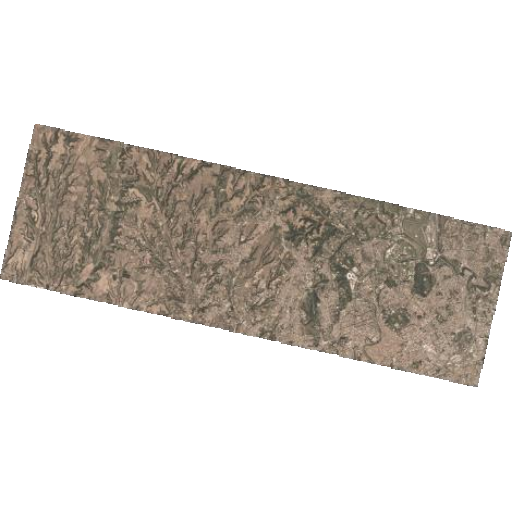

In [22]:

item_id = item_ids[0]
thumbnail = shcd.thumbnail(ThumbnailType.SCOPE, item_id)

import io
from PIL import Image

image_bytes = io.BytesIO(thumbnail.content)
Image.open(image_bytes)

# Data Order

### Query order: Airbus, Planet SkySat and Scope

In [4]:
# example: shcd.order("Order name", <your-collection-id>, Query)

response = shcd.order("New query order", "e34d15c4-99e8-4132-a353-11681af7dd02", query)

### Normal order: Airbus, Planet SkySat and Scope

In [9]:
# example: shcd.order("Order name", <your-collection-id>, Query, items_ids)

response = shcd.order("New normal order", "e34d15c4-99e8-4132-a353-11681af7dd02", query, item_ids=[item_ids[0]])


### Order information

In [13]:
props = ["id","userId","created","name", "collectionId", "provider", "sqkm", "status"]
print(pd.DataFrame(
map(lambda h: response[h], props), props
))


                                                 0
id            ec3d54c4-629d-4dad-90f1-cf1ac05c6f58
userId        0d059c70-e94b-49aa-97ec-06cb7673efcb
created                2022-10-28T07:25:35.962357Z
name                              New normal order
collectionId  e34d15c4-99e8-4132-a353-11681af7dd02
provider                                    AIRBUS
sqkm                                           2.5
status                                     CREATED


### Getting orders

In [5]:
# Optional: Get single order by adding order_id as parameter
# example: shcd.get_orders("asdf12-12bfa...")

orders = shcd.get_orders()
order_ids = [o["id"] for o in orders["data"]]
order_id = order_ids[0]

props = ["id","userId","created","name", "collectionId", "provider", "sqkm", "status"]
for order in orders["data"]:
    print(pd.DataFrame(
      map(lambda h: order[h], props), props
    ))

                                                 0
id            03eb993a-7d1a-423a-accd-533f45d6db9b
userId        0d059c70-e94b-49aa-97ec-06cb7673efcb
created                2022-10-13T08:51:31.643479Z
name                                     airbus-sp
collectionId  e34d15c4-99e8-4132-a353-11681af7dd02
provider                                    AIRBUS
sqkm                                           2.5
status                                        DONE
                                                 0
id            20f5290e-e815-46d6-88d6-8763d8470289
userId        0d059c70-e94b-49aa-97ec-06cb7673efcb
created                2022-10-20T08:23:57.267881Z
name                                      rr test2
collectionId  e34d15c4-99e8-4132-a353-11681af7dd02
provider                                    AIRBUS
sqkm                                           2.5
status                                        DONE
                                                 0
id            3031fc82-d9d9-460

### Delete order

In [24]:
res = shcd.delete_order("326e47cd-c9f7-448c-adde-04ec5c2598ac")
print(res)

DownloadFailedException: Failed to download from:
https://services.sentinel-hub.com/api/v1/dataimport/orders/326e47cd-c9f7-448c-adde-04ec5c2598ac
with HTTPError:
404 Client Error: Not Found for url: https://services.sentinel-hub.com/api/v1/dataimport/orders/326e47cd-c9f7-448c-adde-04ec5c2598ac
Server response: "{"status": 404, "reason": "Not Found", "message": "Not Found", "code": "COMMON_NOT_FOUND"}"

### Confirm order

In [23]:
res = shcd.confirm_order("326e47cd-c9f7-448c-adde-04ec5c2598ac")
print(res)

DownloadFailedException: Failed to download from:
https://services.sentinel-hub.com/api/v1/dataimport/orders/326e47cd-c9f7-448c-adde-04ec5c2598ac/confirm
with HTTPError:
404 Client Error: Not Found for url: https://services.sentinel-hub.com/api/v1/dataimport/orders/326e47cd-c9f7-448c-adde-04ec5c2598ac/confirm
Server response: "{"status": 404, "reason": "Not Found", "message": "Not Found", "code": "COMMON_NOT_FOUND"}"

In [25]:
props = ["id","userId","created","name", "collectionId", "provider", "sqkm", "status"]
print(pd.DataFrame(
map(lambda h: res[h], props), props
))


                                                 0
id            eb2f3a11-92a0-4e6d-bf77-3db17bb0d594
userId        0d059c70-e94b-49aa-97ec-06cb7673efcb
created                2022-10-28T07:17:32.079856Z
name                              New normal order
collectionId  e34d15c4-99e8-4132-a353-11681af7dd02
provider                                    AIRBUS
sqkm                                           2.5
status                                     RUNNING
